## The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset.



### Use the Iris dataset available in the sklearn library.



#### 1. Loading and Preprocessing 
•	Load the Iris dataset from sklearn.

•	Drop the species column since this is a clustering problem.


In [8]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)



In [10]:
# View the first few rows
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

### 2.Clustering Algorithm Implementation 
•	Implement the following two clustering algorithms:

A) KMeans Clustering

•	Provide a brief description of how KMeans clustering works.
•	Explain why KMeans clustering might be suitable for the Iris dataset.
•	Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters.

B) Hierarchical Clustering 

•	Provide a brief description of how Hierarchical clustering works.
•	Explain why Hierarchical clustering might be suitable for the Iris dataset.
•	Apply Hierarchical clustering to the preprocessed Iris dataset and visualize the clusters.


In [19]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# We do NOT include iris.target (species) since this is an unsupervised task
# Final DataFrame: only features used for clustering
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
df.shape

(150, 4)

### How KMeans Works
 *KMeans clustering partitions data into K clusters, where each point belongs to the cluster with the nearest mean (centroid). The algorithm iteratively:*

. Selects initial centroids randomly.

. Assigns each point to the nearest centroid.

. Updates centroids based on the mean of assigned points.

. Repeats until convergence (no change in centroids or labels).

### Why KMeans for Iris
 . The Iris dataset has clear natural groupings (3 species).

. KMeans works well when clusters are spherical and relatively balanced, which fits the Iris data distribution.



### KMeans Clustering and Visualization

C:\Users\GAYATHRY N S\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


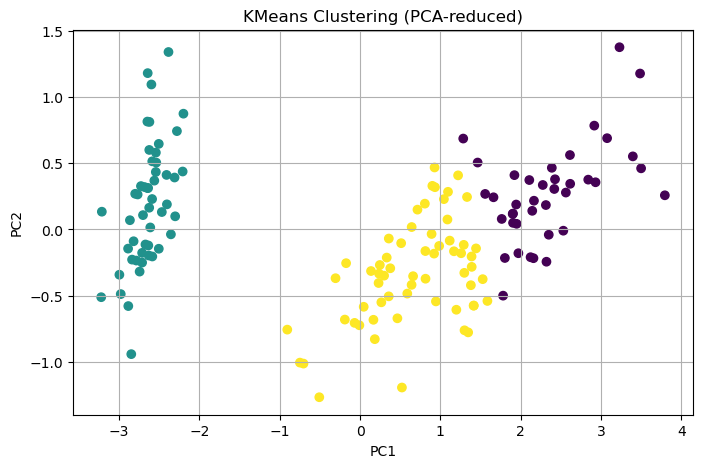

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df[iris.feature_names])

# Plot KMeans clusters
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['kmeans_cluster'], cmap='viridis')
plt.title("KMeans Clustering (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


### B) Hierarchical Clustering 
*How Hierarchical Clustering Works*
   * Hierarchical clustering builds a tree-like structure (dendrogram):

   * Agglomerative (bottom-up): Starts with each data point as a single cluster, then iteratively merges the closest pairs.

   * Divisive (top-down): Starts with all points in one cluster, and recursively splits them.

   * The result is a hierarchy of clusters that can be cut at any level.

*Why Hierarchical for Iris*
   * Doesn't require the number of clusters in advance.

   * Reveals the nested grouping structure and similarity between samples.

   * Suitable for small datasets like Iris (150 samples).

### Hierarchical Clustering and Visualization

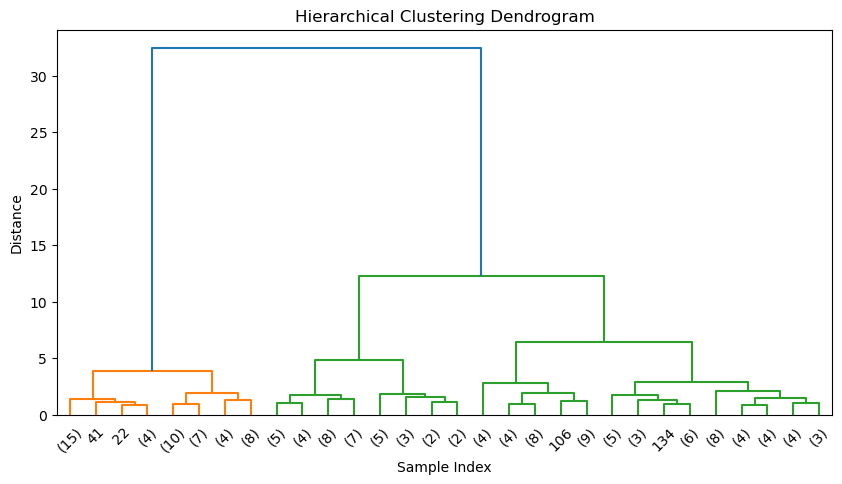

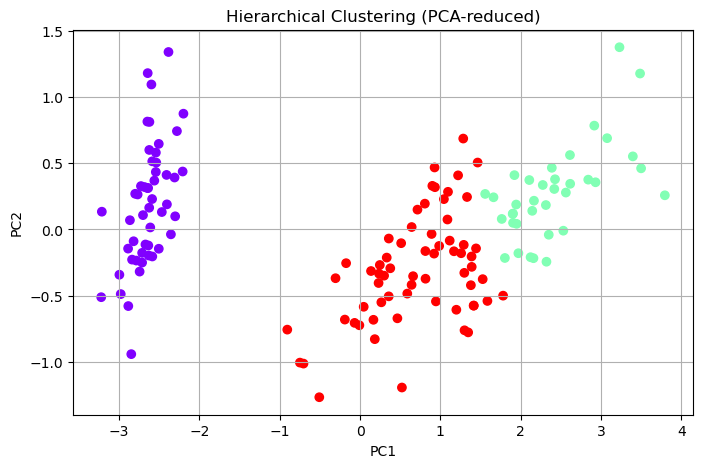

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Perform linkage
linked = linkage(df[iris.feature_names], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Assign clusters (cut tree at 3 clusters)
df['hierarchical_cluster'] = fcluster(linked, 3, criterion='maxclust')

# Visualize hierarchical clusters with PCA
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['hierarchical_cluster'], cmap='rainbow')
plt.title("Hierarchical Clustering (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()
